### ※(점심시간 문제) 동전던지기  도박사의 주장을 반론하기 위한  파이썬 알고리즘 32번을 신뢰구간 68% 에서 신뢰구간 95%로 변경해서 수행하세요 ~

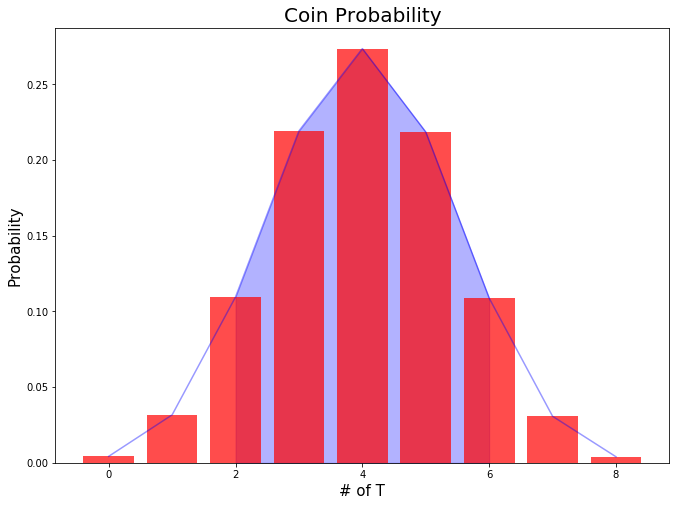

동전을 8 번 던졌을 때 뒷면이 나오는 횟수가 7 번 나올 확률은 신뢰구간 95% 안에 없습니다.


In [2]:
def coin_hypo(coin, num) : 

    import random
    import numpy as np
    import math
    from scipy.stats import norm
    import matplotlib.pyplot as plt

    x = [i for i in range(coin +1)]
    y = [0 for i in range(len(x))]

    for i in range(100000):
        sum=0
        for j in range(coin):
            sum+=random.randint(0,1)
        y[sum]+=1

    for i in range(coin+1):
        y[i]/=100000

    m = []
    for k in range(len(x)) :
        m.append( x[k] * y[k] )
    mu = np.sum(m)
    mu
    var = []
    for k in range(len(x)) :
        var.append(((x[k] - mu)**2)*y[k])
    var_s = np.sum(var)
    sd = math.sqrt(var_s)
    sd
    x_1 = mu - 1.96 * sd
    x_2 = mu + 1.96 * sd

    plt.rcParams["figure.figsize"] = (11, 8)
    plt.bar(x, y,  align='center', color='red', alpha = 0.7)  # 막대그래프 시각화
    plt.fill_between(x , y,  where = (x_1 < x) & (x < x_2) , color = 'blue', alpha = 0.3)
    plt.plot(x, y, color = 'blue', alpha = 0.4)
    plt.xlabel('# of T', fontsize = 15) # x축 이름
    plt.ylabel('Probability', fontsize = 15) # y축 이름
    plt.title('Coin Probability', fontsize = 20)  # 그래프 제목
    plt.show()
    if x_1 <= num <=  x_2 :
        return '동전을 {} 번 던졌을 때 뒷면이 나오는 횟수가 {} 번 나올 확률은 신뢰구간 95% 안에 있습니다.'.format(coin, num)
    else :
        return '동전을 {} 번 던졌을 때 뒷면이 나오는 횟수가 {} 번 나올 확률은 신뢰구간 95% 안에 없습니다.'.format(coin, num)

print(coin_hypo(coin = 8, num = 7))

8번 던져 7번 나오는 경우는 신뢰구간 95% 안에 없다.


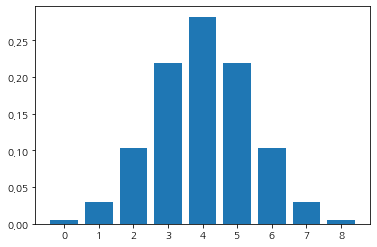

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import math

coin = ['앞면', '뒷면']
x = np.arange(0,9)
r = math.sqrt(2)
o = math.sqrt(8)
y = norm.pdf(x, 4, r)

plt.bar(x, y, tick_label = x, align='center')

if (7 / 8 - 4) / r * o>= -1.96 and (7 / 8 - 4) / r * o <= 1.96:
    print('8번 던져 7번 나오는 경우는 신뢰구간 95% 안에 있다')
else:
    print('8번 던져 7번 나오는 경우는 신뢰구간 95% 안에 없다.')

### ■ 예제155. 삽입정렬 (insertion sort)
#### 정렬되지 않은 숫자들을 하나씩 빼서 정렬되어 있는 숫자 사이의 올바른 위치에 삽입하는 정렬 방법
```python
a=[5,4,3,2,1,8,9,10]
print(insert_sort(a))          bubble_sort와 insert_sort 속도 비교 실험

[1,2,3,4,5,6,7,8,9,10]
```

### ※ 문제333. 삽입정렬의 코드의 기본골격을 짜기 위해서 이중 for문으로 아래의 결과를 출력하시오
```python
i     j
1     0
1     1
2     0
2     1
2     2
...
5     0
5     1
5     2
5     3
5     4
5     5
```

In [4]:
for i in range(1,6):
    for j in range(i+1):
        print(f'{i}   {j}')

1   0
1   1
2   0
2   1
2   2
3   0
3   1
3   2
3   3
4   0
4   1
4   2
4   3
4   4
5   0
5   1
5   2
5   3
5   4
5   5


### ※ 문제334. 아래의 a리스트의 요소를 위의 for loop문으로 가져오시오

In [23]:
a=[5,4,3,2,1,8,9,10]
for i in range(1,len(a)):
    for j in range(i):
        print(f'{a[i]}   {a[j]}')

4   5
3   5
3   4
2   5
2   4
2   3
1   5
1   4
1   3
1   2
8   5
8   4
8   3
8   2
8   1
9   5
9   4
9   3
9   2
9   1
9   8
10   5
10   4
10   3
10   2
10   1
10   8
10   9


### ※ 문제335. 아래의 코드를 이용해서 삽입정렬을 완성하시오
```python
a=[5,4,3,2,1,8,9,10]
for i in range(1,len(a)):
    for j in range(i):
        print(f'{a[i]}   {a[j]}')
```

In [49]:
import random
import time
def insert_sort(a):
    """
    a=any kind of list
    """
    start=time.time()
    for i in range(1,len(a)):
        for j in range(i):
            if a[i]<a[j]:            
                a.insert(a.index(a[j]),a.pop(i))                
    end=time.time()
    return f'{end-start}초 {a}'

In [59]:
ls=[1,2,3]
ls.insert(0,ls.pop(1))
ls

[2, 1, 3]

In [52]:
ls=[i for i in range(1,100_000)]
a=[i for i in random.sample(ls,10_000)]

In [53]:
insert_sort(a)

'4.7920448780059814초 [2, 5, 10, 87, 103, 110, 113, 128, 133, 148, 152, 155, 162, 171, 172, 179, 182, 186, 187, 190, 194, 211, 216, 229, 232, 237, 239, 254, 265, 308, 317, 319, 328, 329, 331, 332, 340, 344, 349, 353, 362, 375, 398, 399, 425, 464, 466, 468, 498, 522, 526, 535, 545, 547, 556, 578, 585, 592, 593, 595, 596, 599, 602, 625, 626, 640, 656, 666, 671, 692, 693, 707, 714, 721, 730, 742, 743, 751, 766, 791, 793, 805, 838, 839, 853, 862, 868, 879, 888, 898, 902, 903, 936, 938, 961, 964, 968, 972, 999, 1022, 1029, 1039, 1050, 1051, 1059, 1067, 1074, 1081, 1095, 1103, 1105, 1120, 1129, 1139, 1169, 1187, 1192, 1197, 1211, 1219, 1224, 1233, 1236, 1237, 1239, 1253, 1255, 1266, 1282, 1294, 1304, 1317, 1328, 1358, 1375, 1384, 1394, 1424, 1428, 1436, 1439, 1469, 1471, 1495, 1507, 1509, 1512, 1528, 1535, 1546, 1585, 1591, 1592, 1619, 1626, 1627, 1646, 1660, 1663, 1692, 1699, 1706, 1710, 1713, 1721, 1724, 1733, 1742, 1757, 1765, 1769, 1774, 1776, 1786, 1799, 1806, 1815, 1821, 1822, 1831, 183

In [48]:
import time
def bubble_sort(a):
    start=time.time()
    """
    a = list
    """
    n=len(a)
    for i in range(1,n-1):
        for j in range(len(a)-i):
            if a[j]>a[j+1]:
                a[j],a[j+1]=a[j+1],a[j]
    end=time.time()
    return f'{end-start}초 {a} '
# a=[5,102,99,56,75,1,8,9,18,20,46,47,98,86]                

In [54]:
bubble_sort(a)

'5.2287750244140625초 [2, 5, 10, 87, 103, 110, 113, 128, 133, 148, 152, 155, 162, 171, 172, 179, 182, 186, 187, 190, 194, 211, 216, 229, 232, 237, 239, 254, 265, 308, 317, 319, 328, 329, 331, 332, 340, 344, 349, 353, 362, 375, 398, 399, 425, 464, 466, 468, 498, 522, 526, 535, 545, 547, 556, 578, 585, 592, 593, 595, 596, 599, 602, 625, 626, 640, 656, 666, 671, 692, 693, 707, 714, 721, 730, 742, 743, 751, 766, 791, 793, 805, 838, 839, 853, 862, 868, 879, 888, 898, 902, 903, 936, 938, 961, 964, 968, 972, 999, 1022, 1029, 1039, 1050, 1051, 1059, 1067, 1074, 1081, 1095, 1103, 1105, 1120, 1129, 1139, 1169, 1187, 1192, 1197, 1211, 1219, 1224, 1233, 1236, 1237, 1239, 1253, 1255, 1266, 1282, 1294, 1304, 1317, 1328, 1358, 1375, 1384, 1394, 1424, 1428, 1436, 1439, 1469, 1471, 1495, 1507, 1509, 1512, 1528, 1535, 1546, 1585, 1591, 1592, 1619, 1626, 1627, 1646, 1660, 1663, 1692, 1699, 1706, 1710, 1713, 1721, 1724, 1733, 1742, 1757, 1765, 1769, 1774, 1776, 1786, 1799, 1806, 1815, 1821, 1822, 1831, 183